11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━

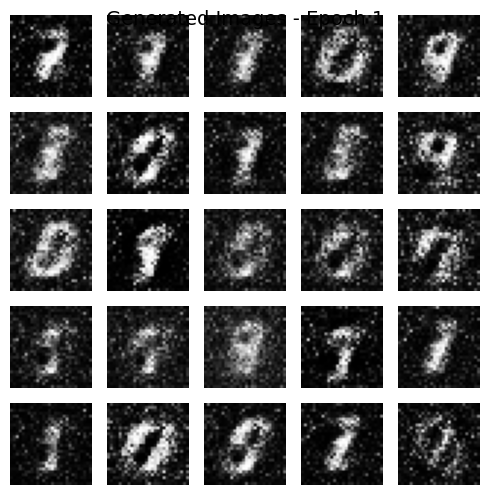

In [ ]:
# Install TensorFlow (if not already installed)
!pip install -q tensorflow

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

# Function to load MNIST data
def load_mnist_data():
    (train_images, train_labels), (_, _) = mnist.load_data()
    train_images = (train_images.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
    train_images = train_images.reshape(-1, 784)  # Flatten images
    return train_images

# Optimizer setup
def build_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

# Generator architecture
def build_generator():
    model = Sequential([
        Dense(256, input_dim=100),
        LeakyReLU(0.2),
        Dense(512),
        LeakyReLU(0.2),
        Dense(1024),
        LeakyReLU(0.2),
        Dense(784, activation='tanh')  # Output layer for 28x28 image
    ])
    return model

# Discriminator architecture
def build_discriminator():
    model = Sequential([
        Dense(1024, input_dim=784),
        LeakyReLU(0.2),
        Dropout(0.3),
        Dense(512),
        LeakyReLU(0.2),
        Dropout(0.3),
        Dense(256),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')  # Binary output: real or fake
    ])
    model.compile(loss='binary_crossentropy', optimizer=build_optimizer())
    return model

# Combine Generator and Discriminator to form GAN
def build_gan(discriminator, generator):
    discriminator.trainable = False
    noise_input = Input(shape=(100,))
    generated_image = generator(noise_input)
    gan_output = discriminator(generated_image)
    gan = Model(noise_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=build_optimizer())
    return gan

# Function to plot generated images
def plot_generated_images(epoch, generator_model, num_images=25, grid_size=(5,5), figsize=(5,5)):
    noise = np.random.normal(0, 1, size=(num_images, 100))
    generated_images = generator_model.predict(noise)
    generated_images = generated_images.reshape(num_images, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(num_images):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f'Generated Images - Epoch {epoch}', fontsize=14)
    plt.show()

# Training function
def train_gan(epochs=1, batch_size=128):
    # Load data
    training_images = load_mnist_data()
    total_batches = training_images.shape[0] // batch_size

    # Build models
    generator = build_generator()
    discriminator = build_discriminator()
    gan_model = build_gan(discriminator, generator)

    for epoch in range(1, epochs + 1):
        for _ in range(total_batches):
            # Train discriminator
            noise = np.random.normal(0, 1, size=(batch_size, 100))
            fake_images = generator.predict(noise)

            real_images = training_images[np.random.randint(0, training_images.shape[0], batch_size)]
            combined_images = np.concatenate([real_images, fake_images])
            labels = np.concatenate([np.ones(batch_size), np.zeros(batch_size)])

            discriminator.trainable = True
            discriminator.train_on_batch(combined_images, labels)

            # Train generator (via GAN)
            noise = np.random.normal(0, 1, size=(batch_size, 100))
            misleading_labels = np.ones(batch_size)

            discriminator.trainable = False
            gan_model.train_on_batch(noise, misleading_labels)

        # Visualize results after each epoch
        print(f"Epoch {epoch}/{epochs} complete.")
        plot_generated_images(epoch, generator)

# Run training (1 epoch for quick demo)
train_gan(epochs=1, batch_size=128)
